In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd

In [2]:
data_path = os.getcwd() + '\\..\\data'
filenames = [data_path + '\\' + filename for filename in os.listdir(data_path)]
filenames

['F:\\Bonsai Workflows\\random_coherent_points\\notebook\\..\\data\\DATE-2022-04-22_TIME-01-15-43_NICHOLAS-GUILBEAULT_data.csv',
 'F:\\Bonsai Workflows\\random_coherent_points\\notebook\\..\\data\\DATE-2022-04-22_TIME-01-22-09_NICHOLAS-GUILBEAULT_data.csv',
 'F:\\Bonsai Workflows\\random_coherent_points\\notebook\\..\\data\\DATE-2022-04-22_TIME-01-27-01_NICHOLAS-GUILBEAULT_data.csv',
 'F:\\Bonsai Workflows\\random_coherent_points\\notebook\\..\\data\\DATE-2022-04-22_TIME-01-58-50_NICHOLAS-GUILBEAULT_data.csv',
 'F:\\Bonsai Workflows\\random_coherent_points\\notebook\\..\\data\\DATE-2022-04-22_TIME-12-03-23_NICHOLAS-GUILBEAULT_data.csv']

In [3]:
tmp = []
for filename in filenames:
    tmp.append(pd.read_csv(filename))
    filename_col = [os.path.basename(filename) for i in range(len(tmp[-1]))]
    tmp[-1]['Filename'] = filename_col
data = pd.concat(tmp, ignore_index = True)
del(tmp)
data

,TrialNum,ChoiceDirection,ChoiceMagnitude,ProportionCoherent,Direction,Magnitude,Response,Filename
0,1,74.864156,0.280854,0.068781,-155.238826,0.041269,True,DATE-2022-04-22_TIME-01-15-43_NICHOLAS-GUILBEA...
1,2,86.185937,0.283962,0.743279,87.580536,0.445968,True,DATE-2022-04-22_TIME-01-15-43_NICHOLAS-GUILBEA...
2,3,-28.837502,0.313296,0.429982,-25.206559,0.257989,True,DATE-2022-04-22_TIME-01-15-43_NICHOLAS-GUILBEA...
3,4,-125.665003,0.348744,0.057657,-159.243353,0.034594,True,DATE-2022-04-22_TIME-01-15-43_NICHOLAS-GUILBEA...
4,5,47.269275,0.337319,0.628618,46.302395,0.377171,True,DATE-2022-04-22_TIME-01-15-43_NICHOLAS-GUILBEA...
...,...,...,...,...,...,...,...,...
495,96,-89.015631,0.646762,0.210247,-104.311200,0.126148,True,DATE-2022-04-22_TIME-12-03-23_NICHOLAS-GUILBEA...
496,97,-17.774516,0.487726,0.459099,-14.724336,0.275459,True,DATE-2022-04-22_TIME-12-03-23_NICHOLAS-GUILBEA...
497,98,-103.813400,0.623591,0.254127,-88.514274,0.152476,True,DATE-2022-04-22_TIME-12-03-23_NICHOLAS-GUILBEA...
498,99,-17.852062,0.587160,0.466138,-12.190397,0.279683,True,DATE-2022-04-22_TIME-12-03-23_NICHOLAS-GUILBEA...


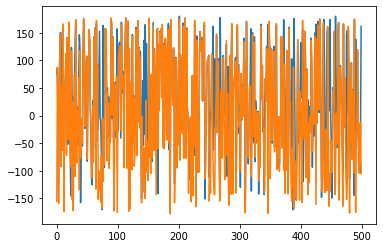

In [4]:
plt.plot(data['ChoiceDirection'])
plt.plot(data['Direction'])
plt.show()

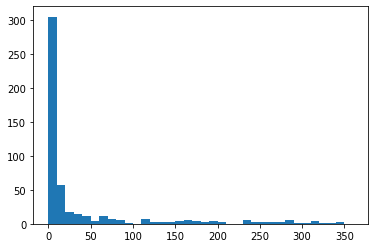

In [5]:
plt.hist(np.abs(data['Direction'] - data['ChoiceDirection']), range = [0, 360], bins = 36)
plt.show()

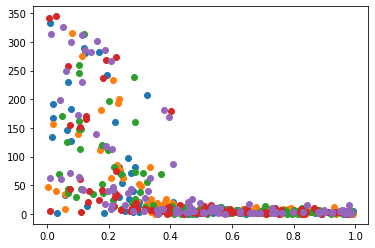

In [6]:
for grouped_data in data.groupby('Filename'):
    filename, group_data = grouped_data
    plt.scatter(group_data['ProportionCoherent'], np.abs(group_data['Direction'] - group_data['ChoiceDirection']), label = filename)
# plt.legend()
plt.show()

(0.0, 1.0)

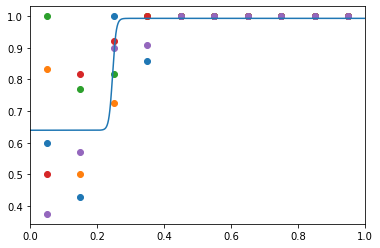

In [7]:
import scipy.optimize as opt

def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

bins = np.arange(0, 1.1, 0.1)
x = [(edge1 + edge2) / 2 for edge1, edge2 in zip(bins[:-1], bins[1:])]
all_data = []

for grouped_data in data.groupby('Filename'):
    filename, group_data = grouped_data
    idxs = [np.where(np.logical_and(group_data['ProportionCoherent'] > edge1, group_data['ProportionCoherent'] < edge2))[0] for edge1, edge2 in zip(bins[:-1], bins[1:])]
    perceived = [(np.abs(group_data.iloc[idx]['Direction'] - group_data.iloc[idx]['ChoiceDirection']) < 180).sum() / len(idx) for idx in idxs]
    all_data.append(perceived)
    plt.scatter(x, perceived, label = filename)
    
popt, pcov = opt.curve_fit(f, x, np.mean(all_data, axis = 0), method="trf")
x_fit = np.linspace(0, 1, 1000)
y_fit = f(x_fit, *popt)
                 
plt.plot(x_fit, y_fit, '-')

plt.xlim([0, 1])